# **`Preprocessing data`**

In [ ]:
import pandas as pd
import numpy as np
companies = ["ExxonMobil","Nike","Apple"]
dfs = {i: pd.read_csv("sample_data/{}_22.02.2018-2021.csv".format(i)) for i in companies }
for n,d in dfs.items():
  print(n,d)


ExxonMobil             Дата   Цена  Откр.  Макс.   Мин.   Объём  Изм. %
0     21.05.2021  59,48  59,43  59,82  59,18   6,13M   1,09%
1     20.05.2021  58,84  58,97  59,14  58,25  20,69M  -0,24%
2     19.05.2021  58,98  59,24  59,85  58,42  28,89M  -2,40%
3     18.05.2021  60,43  62,00  62,30  60,42  25,17M  -2,83%
4     17.05.2021  62,19  60,60  62,25  60,45  25,28M   2,34%
...          ...    ...    ...    ...    ...     ...     ...
1529  27.04.2015  87,01  87,41  87,60  86,75  10,53M   0,05%
1530  24.04.2015  86,97  87,19  87,36  86,66   8,41M  -0,65%
1531  23.04.2015  87,54  87,36  88,38  87,31   9,87M   0,09%
1532  22.04.2015  87,46  87,04  87,80  86,34   8,66M   0,67%
1533  21.04.2015  86,88  87,38  87,62  86,68  10,10M  -0,41%

[1534 rows x 7 columns]
Nike             Дата    Цена   Откр.   Макс.    Мин.  Объём  Изм. %
0     21.05.2021  132,92  133,99  134,15  132,60  1,30M  -0,26%
1     20.05.2021  133,27  133,44  134,16  132,19  4,93M   0,23%
2     19.05.2021  132,96  133,48  1

In [ ]:
print(len(dfs))
for i in dfs.values():
  print(i.shape)

3
(1534, 7)
(1534, 7)
(755, 7)


In [ ]:
for name, stock in dfs.items():
  for col, data in stock.items():
    if col == "Дата":
      for i,val in enumerate(data):
        temp = val.split(".")
        data[i] = temp[2]+"-"+temp[1]+"-"+temp[0]
    else: 
      for i, val in enumerate(data):
        if val != None:
          if val.find("%")!=-1:
            data[i] = val.split("%")[0].replace(",",".")
          elif (val.find("M"))!=-1:
            data[i] = val.split("M")[0].replace(",",".")
          elif (val.find("K"))!=-1:
            data[i] = val.split("K")[0].replace(",",".")
          elif val == "-":
            data[i] = '0'
          else:
            data[i] = val.replace(",",".")

Преобразуем столбцы в числовой тип

In [ ]:
def convert_to_type(dfs = dfs):
  for name,stock in dfs.items():
    for col in stock.keys():
      if col != "Дата":
        dfs[name][col] = pd.to_numeric(dfs[name][col])
      else:
        dfs[name][col] = pd.to_datetime(dfs[name][col])
  return dfs
dfs =  convert_to_type(dfs)

Посмотрим дату

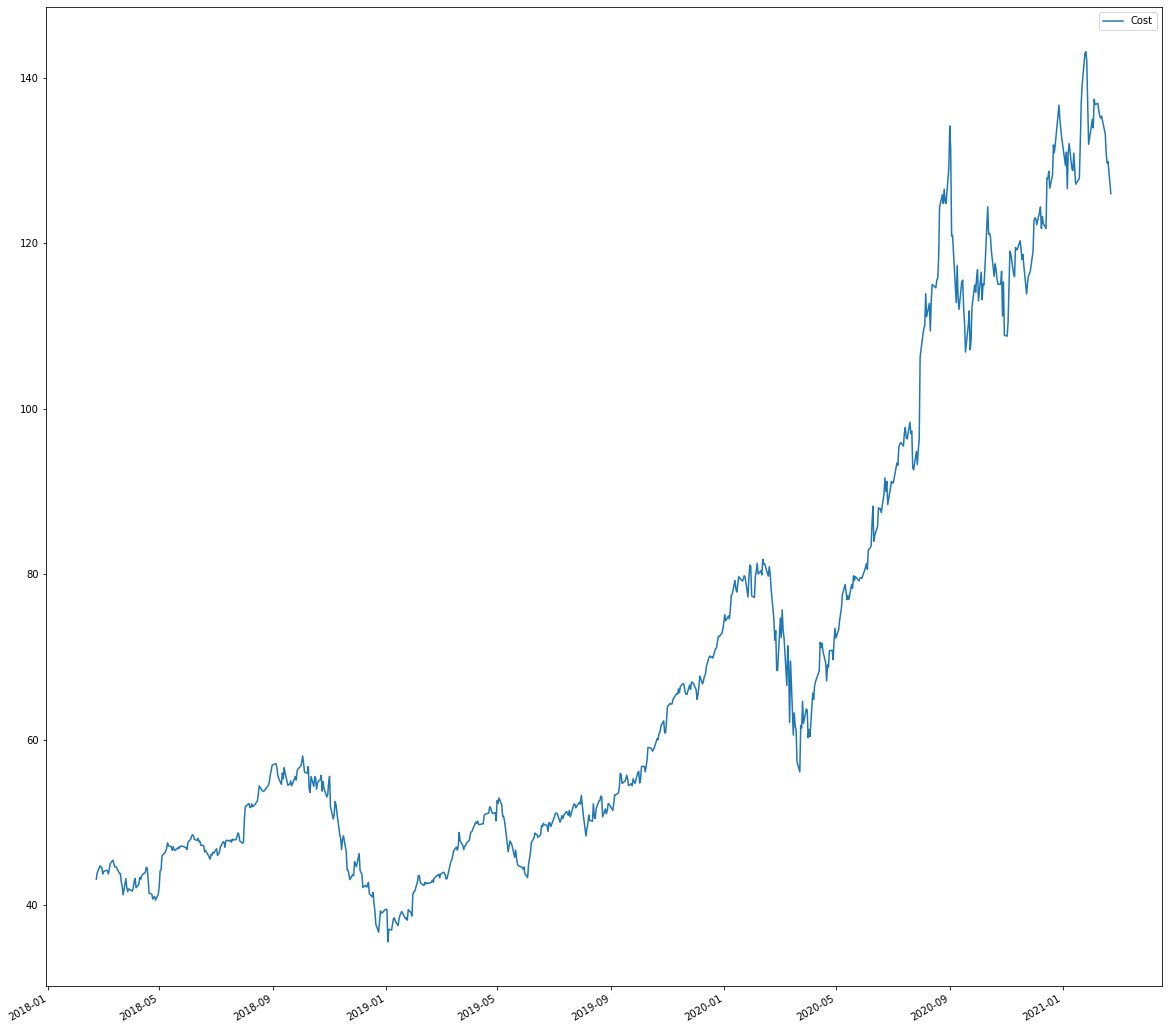

In [ ]:
def constr_data(name = ["Apple"],col1 = "Дата", col2 = "Цена",dfs = dfs):
  from collections import OrderedDict
  full_data = OrderedDict()
  for comp in name:
    lenn = min(len(dfs[comp][col1]),len(dfs[comp][col2]))
    data_grow = list()
    for i in range(lenn - 1,-1,-1):
      temp = [dfs[comp][col1][i],dfs[comp][col2][i]]
      data_grow.append(temp)
    temp = {comp: OrderedDict(data_grow)}
    full_data.update(temp)
  return full_data

import matplotlib.pyplot as plt
stock_df = pd.DataFrame.from_dict(data=constr_data(name = ["Apple"],dfs = dfs)["Apple"], orient="index", columns=["Cost"])
stock_df.plot(figsize=(20,20));

In [ ]:
temp = constr_data(name = ["ExxonMobil", "Apple"],dfs = dfs)

Data_set = pd.DataFrame.from_dict(data=temp["Apple"], 
                                  orient="index", 
                                  columns=["Apple"])
Data_set
Data_set

,Apple
2018-02-22,43.12
2018-02-23,43.88
2018-02-26,44.74
2018-02-27,44.60
2018-02-28,44.53
...,...
2021-02-16,133.19
2021-02-17,130.84
2021-02-18,129.71
2021-02-19,129.87


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import math, time
from sklearn.metrics import mean_squared_error, r2_score
device = torch.device('cuda:0')

In [ ]:

scaler = MinMaxScaler(feature_range=(-1, 1))
Data_set['Apple'] = scaler.fit_transform(Data_set['Apple'].values.reshape(-1,1))

In [ ]:
def load_data(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 30 # choose sequence length
x_train, y_train, x_test, y_test = load_data(Data_set, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (580, 29, 1)
y_train.shape =  (580, 1)
x_test.shape =  (145, 29, 1)
y_test.shape =  (145, 1)


In [ ]:

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
print("Train size: {}. Test size: {}".format(y_train.size(),x_test.size()))

Train size: torch.Size([580, 1]). Test size: torch.Size([145, 29, 1])


Model

In [ ]:
# Build model
#####################
input_dim = 1
hidden_dim = 64
num_layers = 1 # количество слоев
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        self.lstm1 = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        #self.dp = nn.Dropout(0.5)
        #self.lstm2 = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0_t1 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        # Initialize cell state
        c0_t1 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        # Initialize hidden state with zeros
        h0_t2 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        # Initialize cell state
        c0_t2 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()



        out, (hn_t1, cn_t1) = self.lstm1(x, (h0_t1.detach(), c0_t1.detach()))
        #out = self.dp(out)
        #out, (h0_t2, c0_t2) = self.lstm2(out, (h0_t2.detach(), c0_t2.detach()))
 
        out = self.fc(out[:, -1, :]) 
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=1e-05)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm1): LSTM(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
6
torch.Size([256, 1])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([1, 64])
torch.Size([1])


In [ ]:
optimiser = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-06)

In [ ]:
num_epochs = 900
hist = np.zeros(num_epochs)

seq_dim =look_back-1  

for t in range(num_epochs):

    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

Epoch  10 MSE:  0.03697888180613518
Epoch  20 MSE:  0.014175456017255783
Epoch  30 MSE:  0.0043187509290874004
Epoch  40 MSE:  0.0015471837250515819
Epoch  50 MSE:  0.0011865433771163225
Epoch  60 MSE:  0.0010250689228996634
Epoch  70 MSE:  0.0008853626786731184
Epoch  80 MSE:  0.0008649784722365439
Epoch  90 MSE:  0.0008433222537860274
Epoch  100 MSE:  0.0008263255003839731
Epoch  110 MSE:  0.0008132489747367799
Epoch  120 MSE:  0.0008022805559448898
Epoch  130 MSE:  0.0007923652301542461
Epoch  140 MSE:  0.0007831183611415327
Epoch  150 MSE:  0.0007743029855191708
Epoch  160 MSE:  0.0007659051334485412
Epoch  170 MSE:  0.000757925387006253
Epoch  180 MSE:  0.0007503393571823835
Epoch  190 MSE:  0.0007431376725435257
Epoch  200 MSE:  0.0007363088661804795
Epoch  210 MSE:  0.0007298438576981425
Epoch  220 MSE:  0.0007237317622639239
Epoch  230 MSE:  0.0007179628009907901
Epoch  240 MSE:  0.0007125263218767941
Epoch  250 MSE:  0.0007074103341437876
Epoch  260 MSE:  0.0007026022649370134

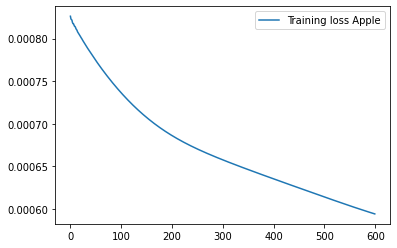

In [ ]:
plt.plot(hist[100:700], label="Training loss Apple")
plt.legend()
plt.show()

In [ ]:
y_test_pred = model(x_test)

In [ ]:
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

In [ ]:
# calculate root mean squared error
trainScore = mean_squared_error(y_train[:,0], y_train_pred[:,0], squared = False)
print('Train Score: %.2f RMSE' % (trainScore))
trainScore = r2_score(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.2f R^2' % (trainScore))


testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0], squared = False))
print('Test Score: %.2f RMSE' % (testScore))
testScore = r2_score(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.2f R^2' % (testScore))

Train Score: 1.29 RMSE
Train Score: 0.99 R^2
Test Score: 1.91 RMSE
Test Score: 0.87 R^2


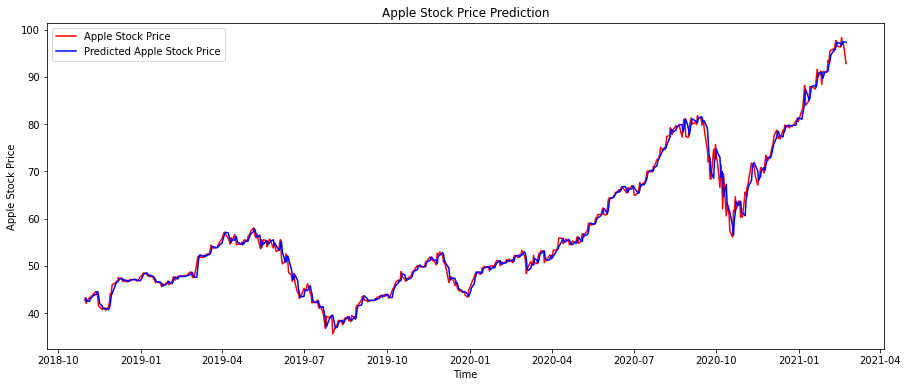

'\nNike\nTrain Score: 0.02 RMSE\nTrain Score: 0.99 R^2\nTest Score: 0.33 RMSE\nTest Score: 0.94 R^2\n'

In [ ]:
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(Data_set[len(Data_set)-len(y_train):].index, y_train, color = 'red', label = 'Apple Stock Price')
axes.plot(Data_set[len(Data_set)-len(y_train):].index, y_train_pred, color = 'blue', label = 'Predicted Apple Stock Price')
#axes.xticks(np.arange(0,394,50))
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.savefig('Apple_pred_train.png')
plt.show()

"""
Nike
Train Score: 0.02 RMSE
Train Score: 0.99 R^2
Test Score: 0.33 RMSE
Test Score: 0.94 R^2
"""

755